# Diabetes Prediction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include = "object"):
    df[column] = le.fit_transform(df[column])

In [8]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<Axes: >

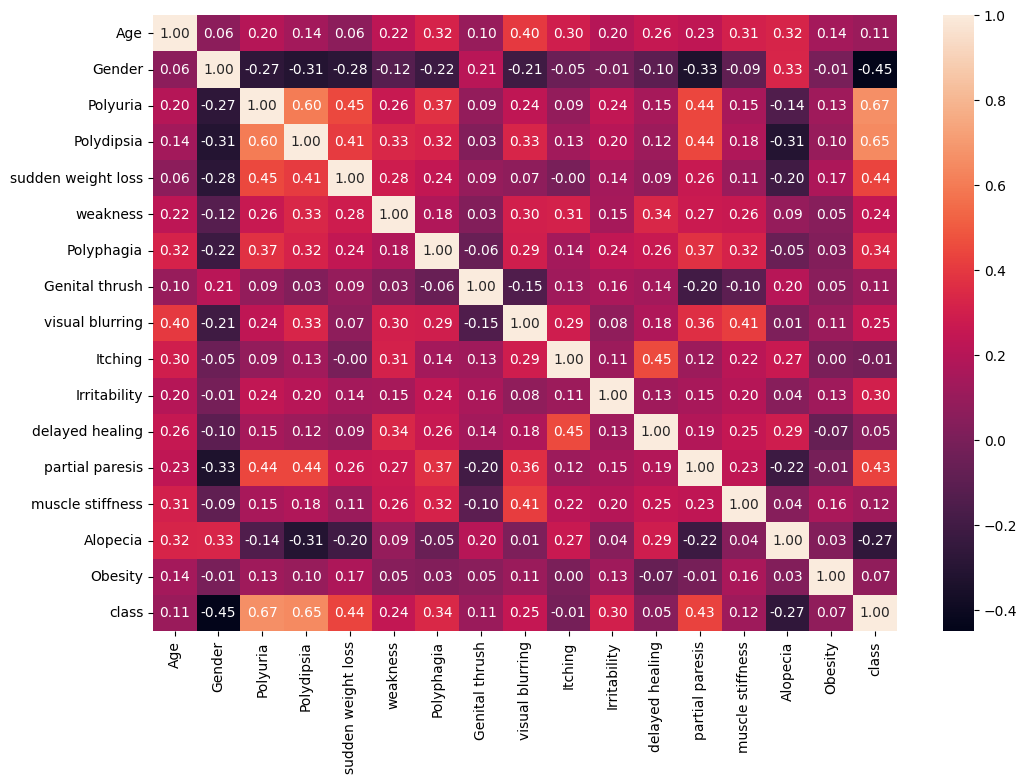

In [10]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot = True,fmt = ".2f")

In [11]:
df = df.drop("Age",axis = 1)
X = df.drop("class",axis = 1)
y = df["class"]

In [12]:
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [13]:
X_train.shape,X_test.shape

((416, 15), (104, 15))

In [15]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
results = {}

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [33]:
model1.score(X_train,y_train)

0.9230769230769231

In [34]:
y_preds = model1.predict(X_test)
acc = accuracy_score(y_test,y_preds)
prec = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)
results["Logistic Regression"] = {"Accuracy":acc,"Precision":prec,"Recall":recall}
acc,prec,recall

(0.9326923076923077, 0.9444444444444444, 0.9577464788732394)

### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
model2.score(X_train,y_train)

0.9951923076923077

In [37]:
y_preds = model2.predict(X_test)
acc = accuracy_score(y_test,y_preds)
prec = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)
results["Random Forest"] = {"Accuracy":acc,"Precision":prec,"Recall":recall}
acc,prec,recall

(0.9807692307692307, 0.9859154929577465, 0.9859154929577465)

### SVM Classifier

In [38]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(X_train,y_train)

SVC()

In [39]:
model3.score(X_train,y_train)

0.9807692307692307

In [40]:
y_preds = model3.predict(X_test)
acc = accuracy_score(y_test,y_preds)
prec = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)
results["SVM"] = {"Accuracy":acc,"Precision":prec,"Recall":recall}
acc,prec,recall

(0.9711538461538461, 0.9857142857142858, 0.971830985915493)

### XGBoost Classifier

In [41]:
from xgboost import XGBClassifier
model4 = XGBClassifier()
model4.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
model4.score(X_train,y_train)

0.9951923076923077

In [43]:
y_preds = model4.predict(X_test)
acc = accuracy_score(y_test,y_preds)
prec = precision_score(y_test,y_preds)
recall = recall_score(y_test,y_preds)
results["XGBoost"] = {"Accuracy":acc,"Precision":prec,"Recall":recall}
acc,prec,recall

(0.9711538461538461, 0.9857142857142858, 0.971830985915493)

In [44]:
results

{'Logistic Regression': {'Accuracy': 0.9326923076923077,
  'Precision': 0.9444444444444444,
  'Recall': 0.9577464788732394},
 'Random Forest': {'Accuracy': 0.9807692307692307,
  'Precision': 0.9859154929577465,
  'Recall': 0.9859154929577465},
 'SVM': {'Accuracy': 0.9711538461538461,
  'Precision': 0.9857142857142858,
  'Recall': 0.971830985915493},
 'XGBoost': {'Accuracy': 0.9711538461538461,
  'Precision': 0.9857142857142858,
  'Recall': 0.971830985915493}}

In [45]:
df_result = pd.DataFrame.from_dict(results,orient = "index")
df_result

,Accuracy,Precision,Recall
Logistic Regression,0.932692,0.944444,0.957746
Random Forest,0.980769,0.985915,0.985915
SVM,0.971154,0.985714,0.971831
XGBoost,0.971154,0.985714,0.971831


In [46]:
import pickle
pickle.dump(model4,open("XGBoost_diabetes.pkl","wb"))

In [47]:
from IPython.display import FileLink
FileLink('XGBoost_diabetes.pkl')

/kaggle/working/XGBoost_diabetes.pkl